In [7]:

import numpy as np
import libpysal as ps
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import geopandas as gp

from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

In [2]:
pip install libpysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.6 MB/s eta 0:00:00


In [3]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install mgwr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 8.4 MB/s eta 0:00:00
  Created wheel for mgwr: filename=mgwr-2.1.2-py3-none-any.whl size=46365 sha256=f347d20e6ab4f241514c7fba414a2e25efd958d0669e3aa11469c1a44beec9bf
  Stored in directory: /root/.cache/pip/wheels/4d/43/6e/bd2d0e1ccee77089e0b266ebc4948d9a90ef363e0be23663aa
  Created wheel for spglm: filename=spglm-1.0.8-py3-none-any.whl size=38785 sha256=80d7ed9461589861f0bb7fba9e03b8634052743877ffc0cda25b2d87ca3c778d
  Stored in directory: /root/.cache/pip/wheels/a2/a7/67/07d6d6809173d768c16235f813520d6a4053984a160aa933fa
Successfully built mgwr spglm


In [6]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 120.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 137.6 MB/s eta 0:00:00


In [8]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [20]:
data_air=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/landslides.csv')

In [21]:
data_air.head()

,UserID,X,Y,Elev,Slope,SinAspct,CosAspct,AbsSouth,Landslid,DistStrm
0,1,616168.5625,5201076.5,1450.475,27.44172,0.409126,-0.912478,24.1499,1,8.506
1,2,624923.8125,5201008.5,1567.476,21.88343,-0.919245,-0.393685,66.8160,1,15.561
2,3,615672.0000,5199187.5,1515.065,38.81030,-0.535024,-0.844837,32.3455,1,41.238
3,4,615209.3125,5199112.0,1459.827,26.71631,-0.828548,-0.559918,55.9499,1,17.539
4,5,616354.6875,5198945.5,1379.442,27.55271,-0.872281,-0.489005,60.7248,1,35.023


In [22]:
shp_air=gp.read_file('/content/drive/MyDrive/Colab Notebooks/clearwater/quads.shp')

<Axes: >

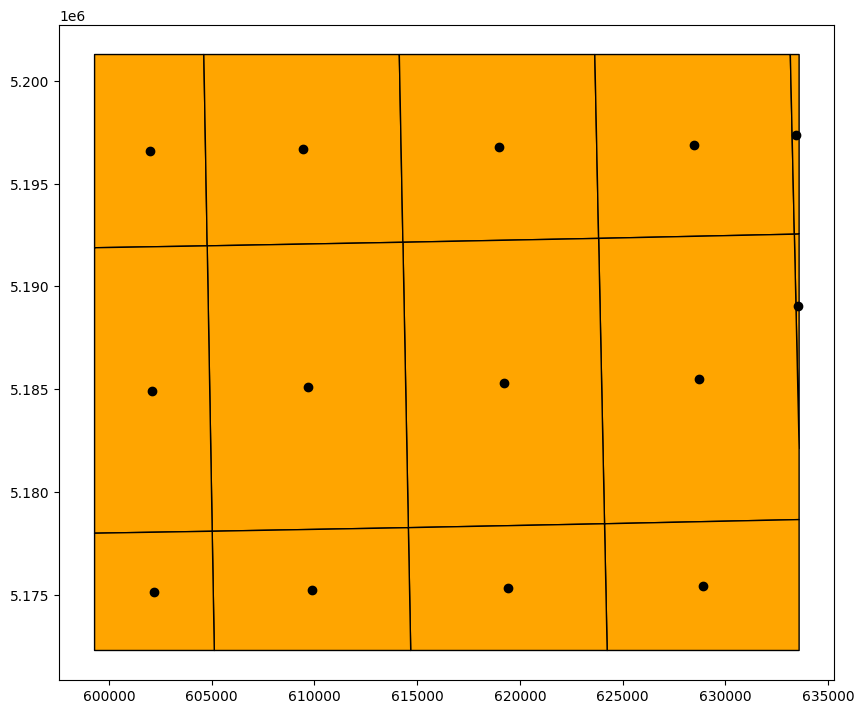

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
shp_air.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'orange'})
shp_air.centroid.plot(ax=ax, c='black')

In [24]:
# Tentukan variabel bebas dan terikatnya
d_y = data_air['Landslid'].values.reshape((-1,1))
d_X = data_air[['Elev', 'Slope']].values
# Tentukan Latitude dan Longitude
u = data_air['X']
v = data_air['Y']
d_coords = list(zip(u,v))

d_X = (d_X - d_X.mean(axis=0)) / d_X.std(axis=0)

d_y = d_y.reshape((-1,1))

d_y = (d_y - d_y.mean(axis=0)) / d_y.std(axis=0)

In [25]:
# Kalibrate GWR model
gwr_selector = Sel_BW(d_coords, d_y, d_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(d_coords, d_y, d_X, gwr_bw).fit()

96.0


In [15]:
gwr_results.params[0:5]

array([[ 0.19811275, -0.17504834,  0.09145796],
       [ 0.23597657, -0.17344213,  0.0617439 ],
       [ 0.19173748, -0.15576904,  0.10169045],
       [ 0.18293709, -0.16430895,  0.10613757],
       [ 0.20429373, -0.13814613,  0.09577177]])

In [16]:
gwr_results.localR2[0:10]

array([[0.1070806 ],
       [0.08799355],
       [0.10164755],
       [0.10824563],
       [0.09021811],
       [0.11683968],
       [0.07083936],
       [0.07500741],
       [0.07567138],
       [0.07667804]])

In [17]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 239
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            190.641
Log-likelihood:                                                    -312.111
AIC:                                                                630.221
AICc:                                                               632.392
BIC:                                                              -1101.805
R2:                                                                   0.202
Adj. R2:                                                              0.196

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------